#### 1. 数组转置和轴对换

    转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性：

In [2]:
import numpy as np

In [3]:
arr=np.arange(12).reshape(3,4)
arr.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积：

In [5]:
arr.dot(arr.T)

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

或者

In [17]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

#### 2. 通用函数：快速的元素级数组函数

    通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

    许多ufunc都是简单的元素级变体，如sqrt和exp：

![](images/ufunc.png)
![](images/ufunc1.png)
![](images/ufunc2.png)
![](images/ufunc3.png)
![](images/ufunc4.png)
![](images/ufunc5.png)

In [10]:
arr = np.arange(10)
np.sqrt(arr)
arr**0.5

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组：

In [19]:
x = np.random.randint(8,size=8)
x

array([7, 0, 4, 6, 2, 0, 7, 3])

In [20]:
y = np.random.randint(8,size=8)
y

array([2, 1, 1, 4, 5, 7, 4, 1])

In [21]:
np.maximum(x, y)  #numpy.maximum计算了x和y中元素级别最大的元素。

array([7, 1, 4, 6, 5, 7, 7, 3])

然并不常见，但有些ufunc的确可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，它会返回浮点数数组的小数和整数部分：

In [22]:
arr = np.random.randint(8,size=8) /5

In [23]:
arr

array([0.4, 0.8, 1. , 1. , 0.4, 0. , 0. , 1.4])

In [11]:
remainder, whole_part = np.modf(arr)
remainder  #小数部分
whole_part   #整数部分

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### 增加一个案例

In [35]:
# y=2x+3

x=np.arange(-2,5,0.1)
y=2*x**2+3

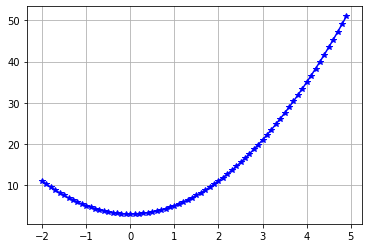

In [36]:
plt.plot(x, y,
         color='blue',  # 全部点设置为红色
         marker='*',  # 点的形状为圆点
         linestyle='-')  # 线型为空，也即点与点之间不用线连接
plt.grid(True)
plt.show()

In [37]:
x = np.array([0, 1, 2])
y = np.array([0, 1])

X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[[0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]]


###### 3. 将条件逻辑表述为数组运算

    numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [43]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取。列表推导式的写法应该如下所示：

In [44]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

In [45]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

>这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写得非常简洁：

In [46]:
result = np.where(cond, xarr, yarr)

In [47]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

### 案例：假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用np.where，则会非常简单：

In [7]:
arr = np.random.randn(4, 4)


In [8]:
arr

array([[-0.3332185 ,  0.48023627, -0.55253129,  0.105634  ],
       [-0.89416172, -1.05672338,  0.55378083,  1.18848084],
       [ 0.53239584, -1.7408323 ,  0.51144258, -0.94350432],
       [ 1.18714767, -0.4730665 , -0.40198131, -0.67652776]])

In [9]:
arr2=np.where(arr > 0, 2, -2)

使用np.where，可以将标量和数组结合起来。例如，我可用常数2替换arr中所有正的值：

In [52]:
arr3=np.where(arr[:,3] > 0, 2, -2)

In [53]:
arr3

array([ 2, -2,  2,  2])

In [54]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-2.08946064,  2.        ,  2.        ,  2.        ],
       [ 2.        , -0.68547523,  2.        , -0.71337086],
       [-0.12390254,  2.        , -0.73300087,  2.        ],
       [-0.31769093, -0.50655756,  2.        ,  2.        ]])

#### 4. 数学和统计方法

    可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

#####    mean平均值 sum 求和

In [55]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [56]:
arr.mean()

7.0

In [57]:
arr.mean(axis=0) # 计算每列的平均值

array([5., 6., 7., 8., 9.])

In [58]:
arr.mean(1) #计算每行的平均值

array([ 2.,  7., 12.])

In [59]:
np.mean(arr)

7.0

In [60]:
arr.sum()

105

In [61]:
arr.max()

14

In [62]:
arr.min()

0

arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”。


In [63]:
arr.mean(axis=1)  #计算每行的平均值

array([ 2.,  7., 12.])

In [64]:
arr.mean(axis=0)  #计算每列的平均值

array([5., 6., 7., 8., 9.])

##### cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组：
    cumsum 累加求和

In [65]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [66]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [67]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [68]:
arr.cumsum(axis=0)  #0 列 1 行

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [69]:
arr.cumsum(axis=1)  #0 列 1 行

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In [70]:
arr.cumprod(axis=1)  # 行上累积乘积

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

列出了全部的基本数组统计方法。后续章节中有很多例子都会用到这些方法。

![](mathfun1)

![](images/mathfunc1.png)
![](images/mathfunc2.png)

用于布尔型数组的方法

In [136]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

46

In [139]:
(np.modf(arr)[1]%2==0).sum() #统计整数部分是偶数的个数

69

In [73]:
bools = np.array([False, False, True, False])

In [74]:
bools.any()

True

In [75]:
bools.all()

False

#### 5. 排序

In [76]:
arr = np.random.randn(6)

In [77]:
arr.sort()

In [78]:
arr

array([-2.12765077, -1.3688509 ,  0.43012505,  0.5049809 ,  1.27193109,
        1.31210402])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可：


In [79]:
arr = np.random.randn(5, 3)

In [80]:
arr

array([[-0.31427657, -0.21381588, -0.67316546],
       [ 0.02018489,  1.7526353 , -1.67979933],
       [-0.36517422,  1.87455974, -0.98460127],
       [-0.46571521, -0.0222886 , -0.84775113],
       [ 0.57893301,  1.10143529,  0.33568225]])

In [81]:
arr.sort(1)  # 每行单独排序

In [82]:
arr

array([[-0.67316546, -0.31427657, -0.21381588],
       [-1.67979933,  0.02018489,  1.7526353 ],
       [-0.98460127, -0.36517422,  1.87455974],
       [-0.84775113, -0.46571521, -0.0222886 ],
       [ 0.33568225,  0.57893301,  1.10143529]])

In [83]:
arr.sort(0)  # 每列单独排序  arr.sort(axis=0)

arr.sort(axis=1)  #每行排序

In [84]:
arr

array([[-1.67979933, -0.46571521, -0.21381588],
       [-0.98460127, -0.36517422, -0.0222886 ],
       [-0.84775113, -0.31427657,  1.10143529],
       [-0.67316546,  0.02018489,  1.7526353 ],
       [ 0.33568225,  0.57893301,  1.87455974]])

#### 6. 唯一化以及其它的集合逻辑

NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果：

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [140]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [141]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [142]:
others=['Bob', 'Joe', 'Will']

In [144]:
np.in1d(names,others).all()

True

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

![](collectionfunc.png)

![](images/collectionfunc.png)

In [119]:
x=np.array([1,2,3,4,5])
y=np.array([4,5,6,7,8])

In [120]:
inter=np.intersect1d(x,y)
inter

array([4, 5])

In [121]:
union=np.union1d(x,y)
union

array([1, 2, 3, 4, 5, 6, 7, 8])

In [122]:
np.setdiff1d(y,x)

array([6, 7, 8])

In [123]:
np.setxor1d(x,y)

array([1, 2, 3, 6, 7, 8])